# Sea Creatures Classification

Dataset:
https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste

## TensorFlow and Keras

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
from tensorflow.keras.preprocessing.image import load_img

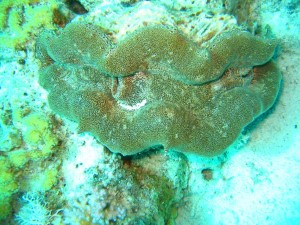

In [9]:
path = './data/Clams'
name = '10711395_a16c4c2901_o.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [10]:
img = load_img(fullname, target_size=(299, 299))

In [11]:
x = np.array(img)
x.shape

(299, 299, 3)

## Pre-trained convolutional neural networks

In [12]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [13]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1733429820.103755     817 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
X = np.array([x])

In [15]:
X.shape

(1, 299, 299, 3)

In [16]:
X = preprocess_input(X)

In [17]:
pred = model.predict(X)

I0000 00:00:1733429824.085398    1043 service.cc:148] XLA service 0x7f5f300028d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733429824.085427    1043 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-05 20:17:04.121219: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733429824.438159    1043 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-05 20:17:05.568479: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1733429826.400350    1043 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [18]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n01496331', 'electric_ray', np.float32(0.16202249)),
  ('n01924916', 'flatworm', np.float32(0.093232036)),
  ('n09256479', 'coral_reef', np.float32(0.07795424)),
  ('n01917289', 'brain_coral', np.float32(0.073272)),
  ('n01950731', 'sea_slug', np.float32(0.037136476))]]

## Training the model

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2,)

In [21]:
train_ds = data_generator.flow_from_directory(
  './data',
  target_size=(150,150),
  batch_size=32,
  subset="training"
)


Found 10979 images belonging to 23 classes.


In [22]:
val_ds = data_generator.flow_from_directory(
  './data',
  target_size=(150,150),
  batch_size=32,
  subset="validation"
)

Found 2732 images belonging to 23 classes.


In [23]:
train_ds.class_indices

{'Clams': 0,
 'Corals': 1,
 'Crabs': 2,
 'Dolphin': 3,
 'Eel': 4,
 'Fish': 5,
 'Jelly Fish': 6,
 'Lobster': 7,
 'Nudibranchs': 8,
 'Octopus': 9,
 'Otter': 10,
 'Penguin': 11,
 'Puffers': 12,
 'Sea Rays': 13,
 'Sea Urchins': 14,
 'Seahorse': 15,
 'Seal': 16,
 'Sharks': 17,
 'Shrimp': 18,
 'Squid': 19,
 'Starfish': 20,
 'Turtle_Tortoise': 21,
 'Whale': 22}

In [24]:
x, y = next(train_ds)

In [25]:
y[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
base_model = Xception(
  weights='imagenet',
  include_top=False,
  input_shape=(150,150,3)
)

base_model.trainable = False


inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(23)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [27]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer, loss=loss, metrics=['accuracy'])

In [28]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


344/344 ━━━━━━━━━━━━━━━━━━━━ 35s 78ms/step - accuracy: 0.5884 - loss: 2.1912 - val_accuracy: 0.6808 - val_loss: 1.6692
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7409 - loss: 1.2836 - val_accuracy: 0.6830 - val_loss: 2.0297
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7828 - loss: 1.0461 - val_accuracy: 0.6717 - val_loss: 2.2350
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.8163 - loss: 0.8337 - val_accuracy: 0.6695 - val_loss: 2.4221
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.8359 - loss: 0.6959 - val_accuracy: 0.6717 - val_loss: 2.3842
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.8539 - loss: 0.6320 - val_accuracy: 0.6673 - val_loss: 2.6395
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.8559 - loss: 0.6362 - val_accuracy: 0.6973 - val_loss: 2.4443
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.8890 - loss: 0.4586 - val_accurac

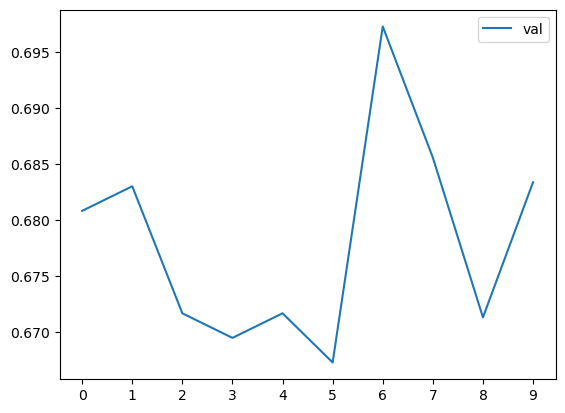

In [29]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Adjusting the learning rate

In [30]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(23)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [31]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.3207 - loss: 2.4239 - val_accuracy: 0.6266 - val_loss: 1.3306
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.6436 - loss: 1.2825 - val_accuracy: 0.6742 - val_loss: 1.0947
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.6961 - loss: 1.0598 - val_accuracy: 0.6874 - val_loss: 1.0121
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7144 - loss: 0.9682 - val_accuracy: 0.7013 - val_loss: 0.9611
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7269 - loss: 0.9148 - val_accuracy: 0.7075 - val_loss: 0.9361
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7360 - loss: 0.8902 - val_accuracy: 0.7123 - val_loss: 0.9128
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7501 - loss: 0.8381 - val_accuracy: 0.7189 - val_loss: 0.9009
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7645 - loss: 0.

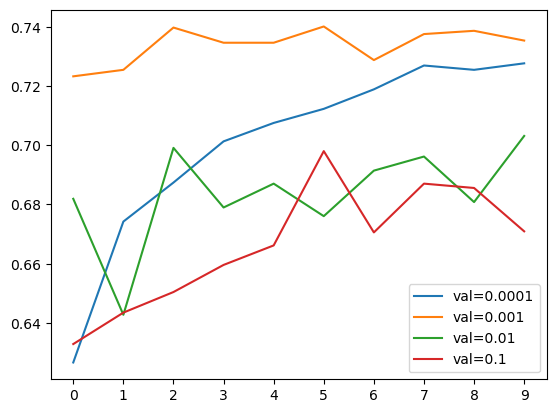

In [32]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

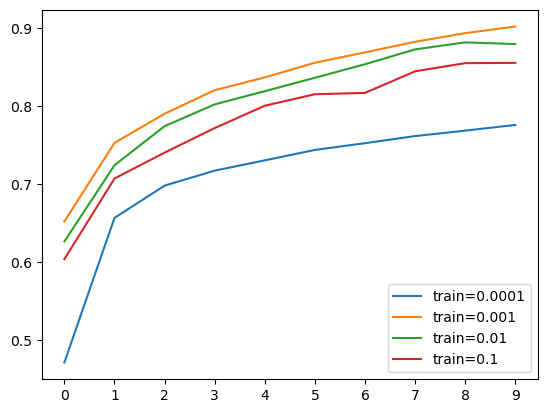

In [33]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    #plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [34]:
learning_rate = 0.001

## Checkpointing

In [37]:
model.save_weights('model_v1.weights.h5')

In [39]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [40]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.5659 - loss: 1.4853 - val_accuracy: 0.7174 - val_loss: 0.9125
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.7590 - loss: 0.7848 - val_accuracy: 0.7284 - val_loss: 0.8745
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.7958 - loss: 0.6604 - val_accuracy: 0.7427 - val_loss: 0.8656
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.8211 - loss: 0.5979 - val_accuracy: 0.7467 - val_loss: 0.8522
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.8558 - loss: 0.4851 - val_accuracy: 0.7474 - val_loss: 0.8676
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.8600 - loss: 0.4704 - val_accuracy: 0.7434 - val_loss: 0.8919
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8740 - loss: 0.4232 - val_accuracy: 0.7452 - val_loss: 0.8966
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8931 - loss: 0.3805 - 

## Adding more layers

In [42]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(23)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [43]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - accuracy: 0.3470 - loss: 2.2817 - val_accuracy: 0.6201 - val_loss: 1.2867
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.6544 - loss: 1.1886 - val_accuracy: 0.6654 - val_loss: 1.0984
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7110 - loss: 0.9884 - val_accuracy: 0.6816 - val_loss: 1.0590
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7277 - loss: 0.9234 - val_accuracy: 0.6874 - val_loss: 1.0364
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7477 - loss: 0.8423 - val_accuracy: 0.6903 - val_loss: 1.0174
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7650 - loss: 0.7868 - val_accuracy: 0.7006 - val_loss: 1.0057
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7763 - loss: 0.7448 - val_accuracy: 0.6980 - val_loss: 1.0203
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7966 - loss: 0.6872

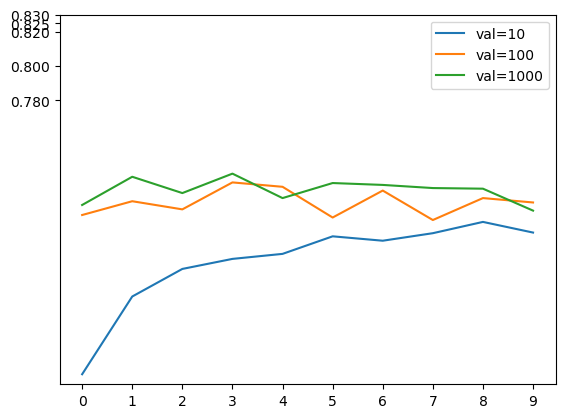

In [44]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()